In [1]:
### required imports

from __future__ import division, print_function

import os
import numpy as np
import networkx as nx

import distance_matrix_functions as dmf

import stackview
import matplotlib.pyplot as plt
%matplotlib inline

# Load data:

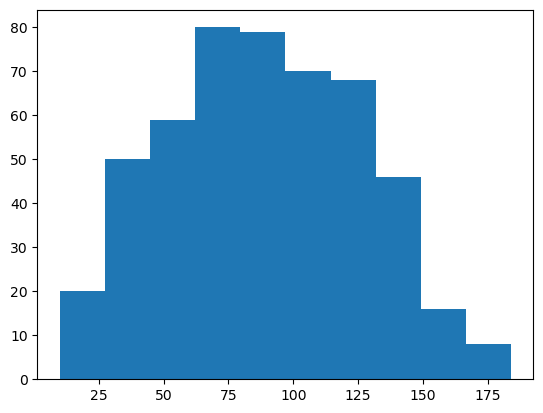

In [2]:
boundary_coordinate_sets = np.load('coordinate_sets.npy', allow_pickle=True)
minimum_distances_between_sets = np.load('minimum_distances.npy')
plt.hist(minimum_distances_between_sets)
plt.show()

In [3]:
index_pairs = np.load('index_pairs.npy')
object_ids = np.load('segment_id_pairs.npy')

n_objects = object_ids.shape[0]
print(n_objects, 'objects with', len(index_pairs), 'combinations')

32 objects with 496 combinations


In [4]:
boundary_set_image = np.load('boundary_set_image.npy')
stackview.slice(boundary_set_image, zoom_factor=2)

# Generate network:

In [5]:
minimum_distances = np.asarray(minimum_distances_between_sets)
minimum_distances.shape

(496,)

complete graph has  496  edges


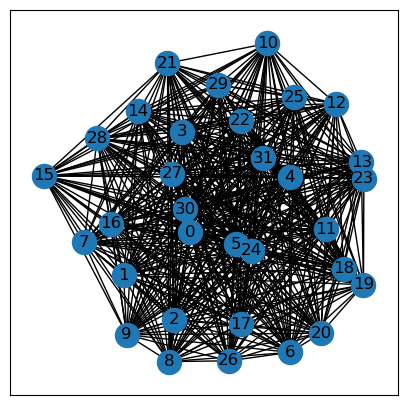

In [6]:
complete_graph = dmf.generate_complete_distance_network(n_objects, index_pairs, minimum_distances_between_sets)
print('complete graph has ', len(complete_graph.edges()), ' edges')

plt.figure(figsize=(5,5))
nx.draw_networkx(complete_graph)
plt.show()

# Prune network:

pruned graph has  249  edges


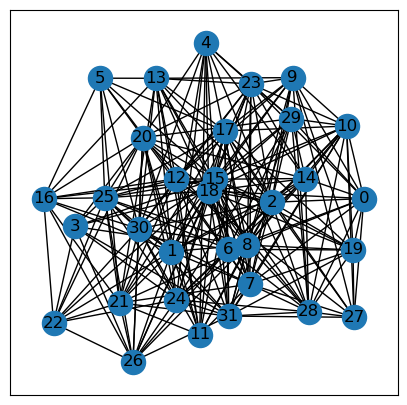

In [7]:
threshold = np.mean(minimum_distances) #user determined
pruned_graph = dmf.prune_distance_network_by_threshold(complete_graph, threshold)
print('pruned graph has ', len(pruned_graph.edges()), ' edges')

plt.figure(figsize=(5,5))
nx.draw_networkx(pruned_graph)
plt.show()

# Prune network for range of thresholds:

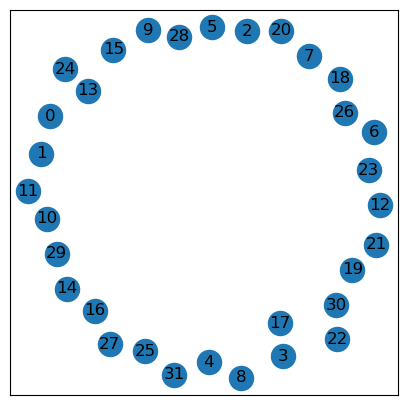

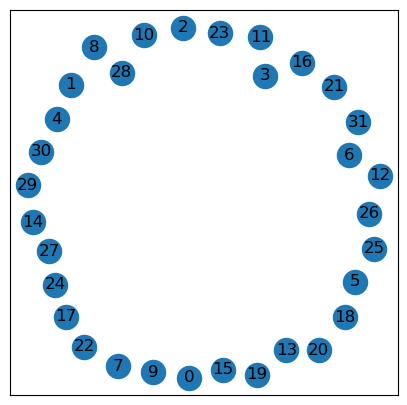

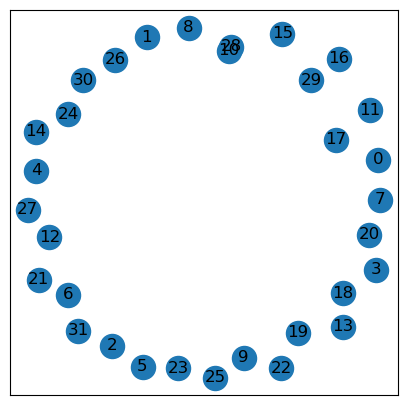

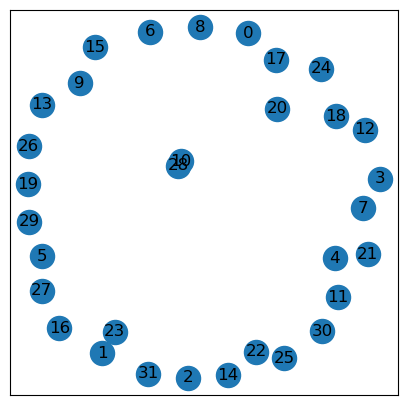

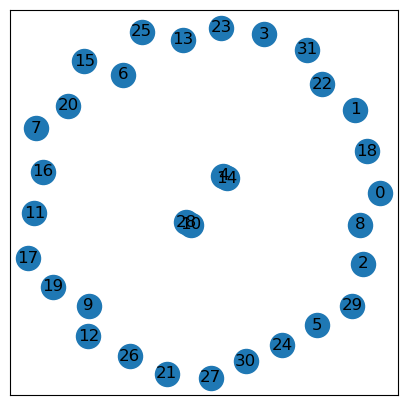

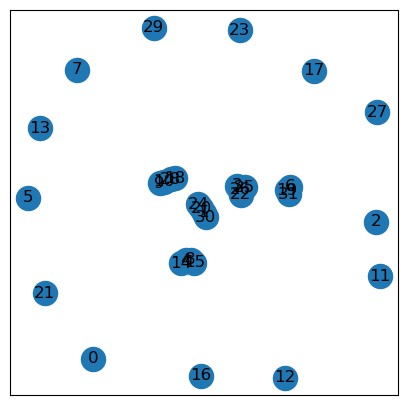

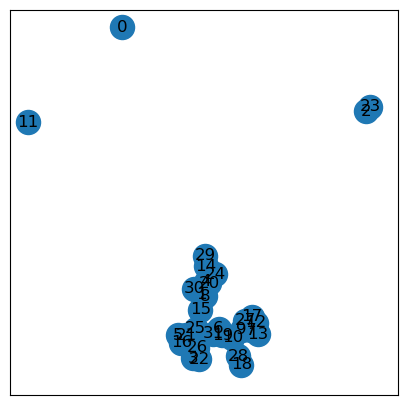

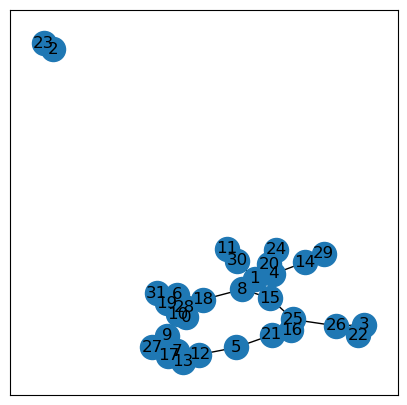

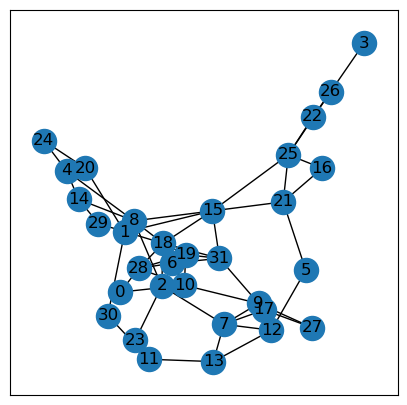

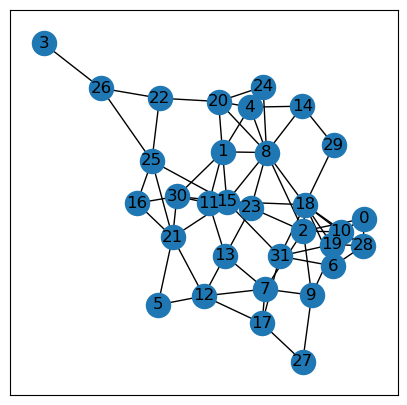

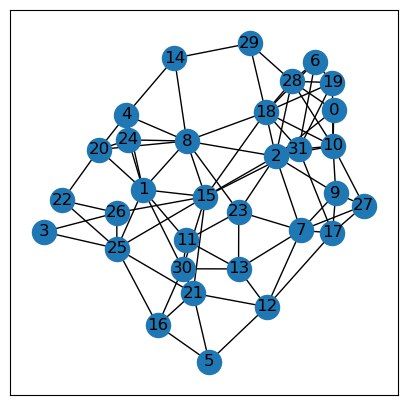

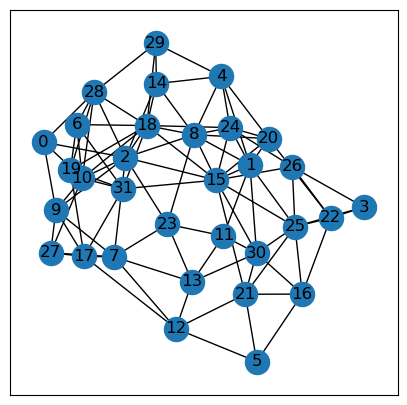

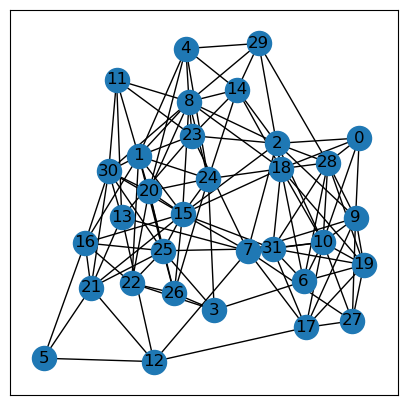

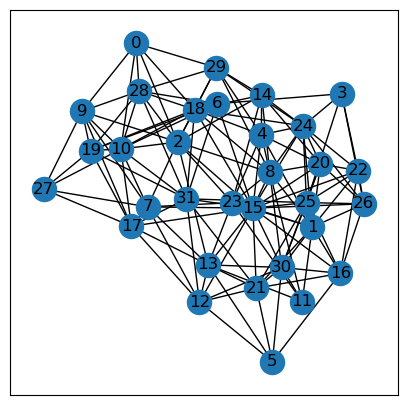

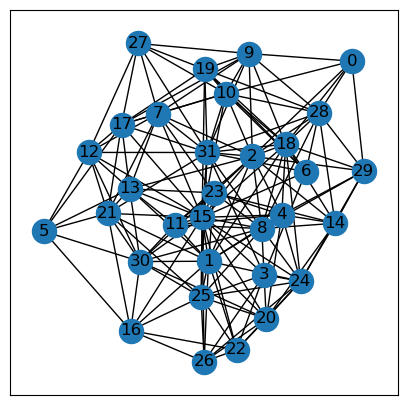

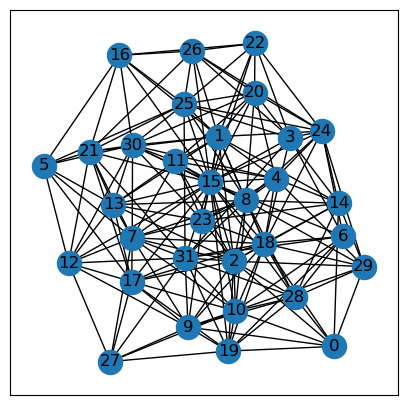

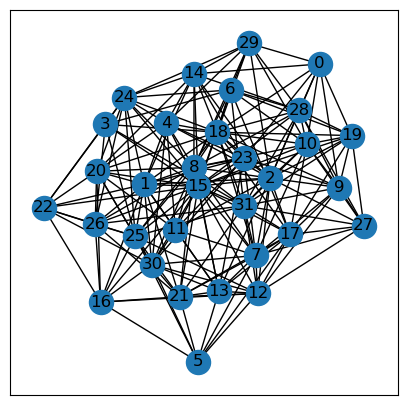

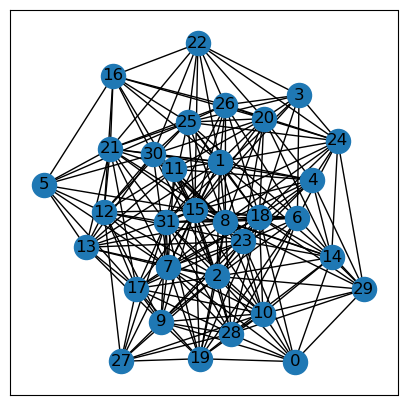

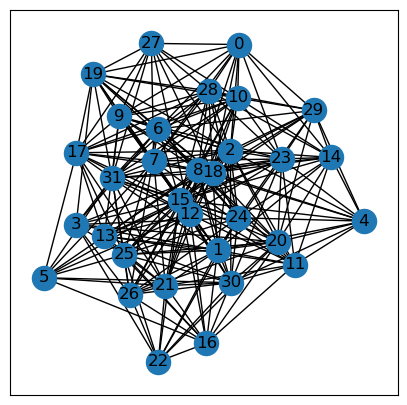

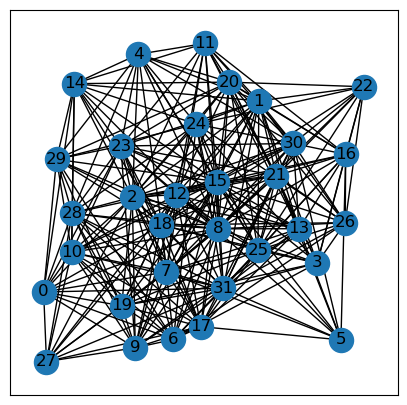

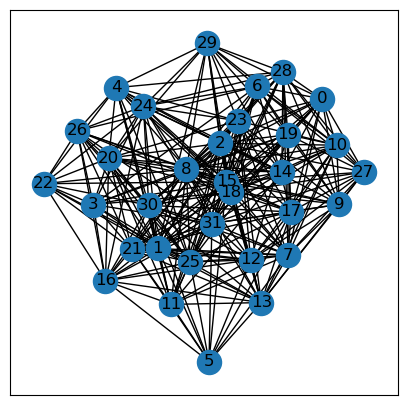

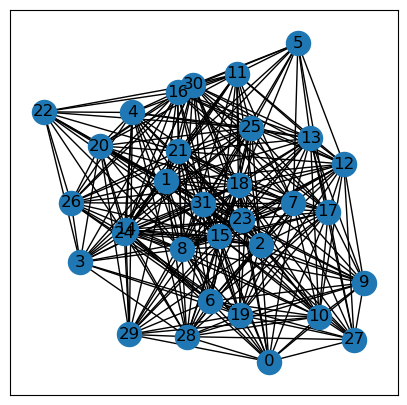

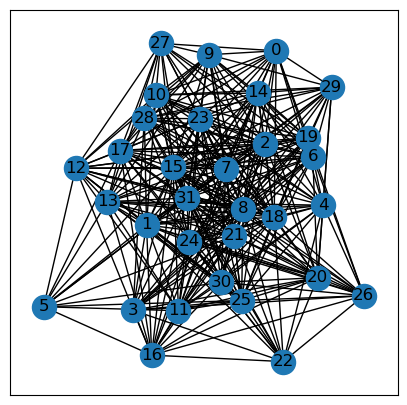

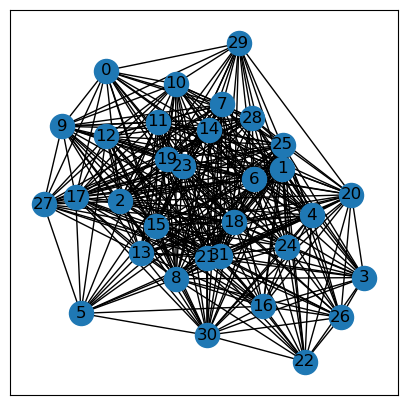

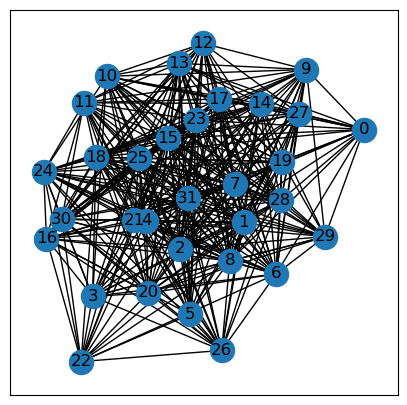

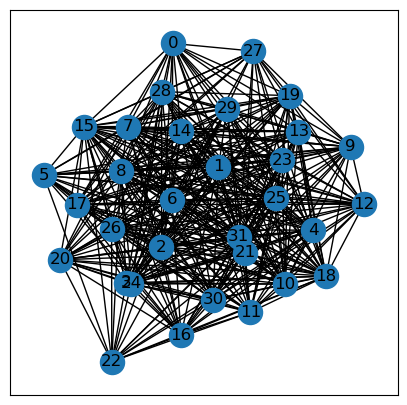

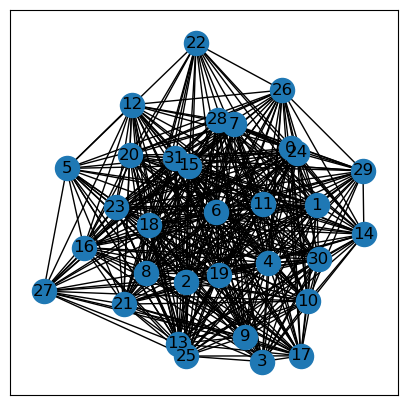

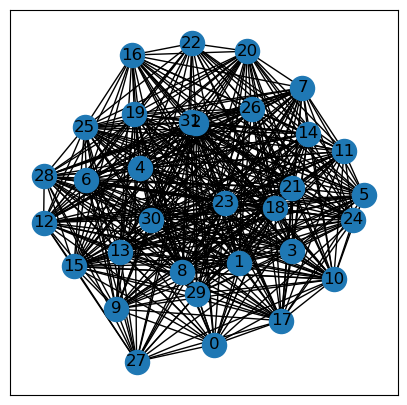

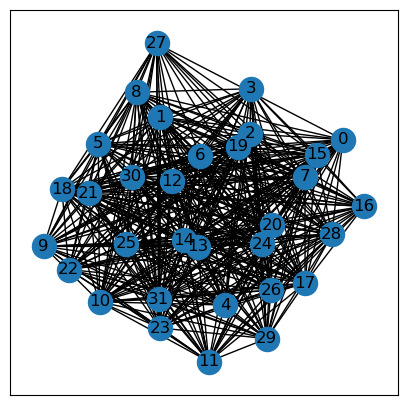

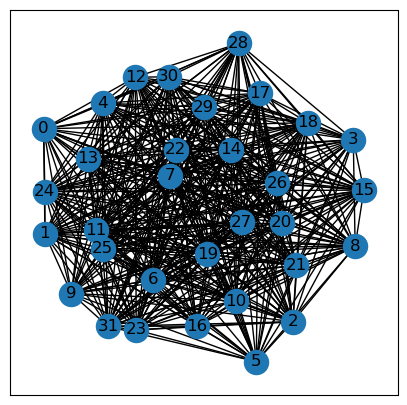

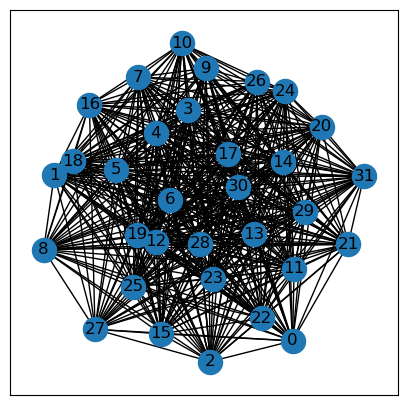

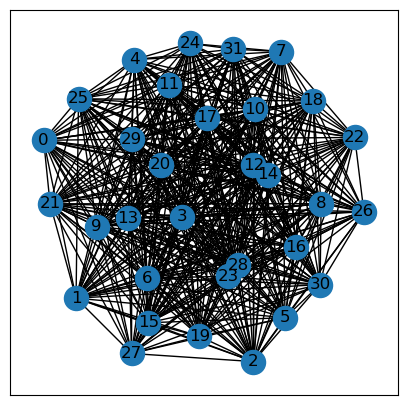

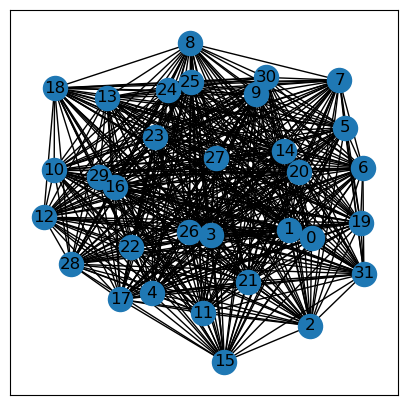

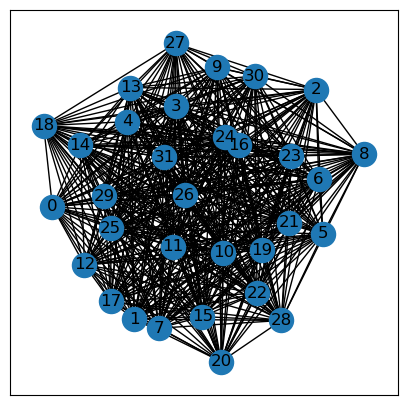

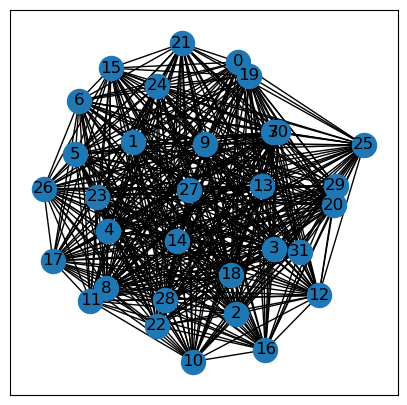

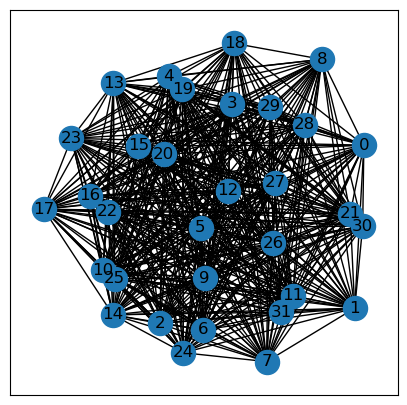

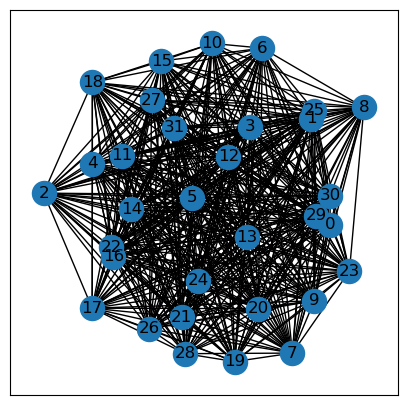

In [8]:
threshold_values = np.arange(1, int(np.amax(minimum_distances_between_sets)), 5)

for i in threshold_values:
    i_pruned_graph = dmf.prune_distance_network_by_threshold(complete_graph, i)
    plt.figure(figsize=(5,5))
    nx.draw_networkx(i_pruned_graph)
    plt.show()

# List nodes of each connected component in a network:

In [9]:
connected_components = dmf.list_network_connected_component_nodes(pruned_graph)
len(connected_components)

1

In [10]:
connected_components_sizes = [len(i) for i in connected_components]
connected_components_sizes

[32]

# Calculate node degrees & network average:

In [11]:
node_degrees = [degree for node, degree in pruned_graph.degree()]
mean_degree = np.mean(node_degrees)
mean_degree

15.5625

# Find network giant component:

In [12]:
giant_component = dmf.find_network_giant_component(connected_components, connected_components_sizes, mean_degree)
len(giant_component)

32

# Calculate network density:

In [13]:
density = dmf.calculate_network_density(pruned_graph)
density

0.5020161290322581

# Calculate node clustering coefficients & network average:

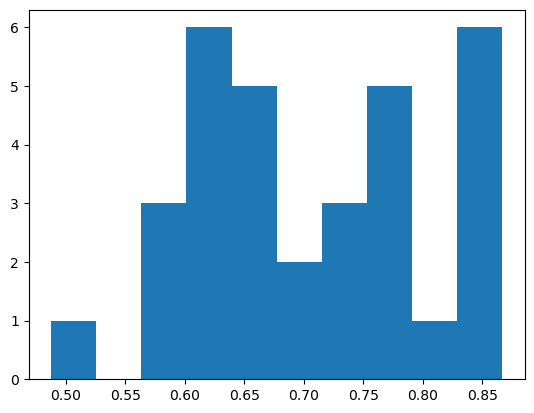

In [14]:
clustering_coefs = [value for key, value in nx.cluster.clustering(pruned_graph).items()]
plt.hist(clustering_coefs)
plt.show()

In [15]:
network_average_clustering_coef = np.mean(clustering_coefs)
network_average_clustering_coef

0.7059632074804116

# Find network cycle basis:

In [16]:
network_cycle_basis = [sorted(list(map(int, i))) for i in nx.cycle_basis(pruned_graph)]
len(network_cycle_basis)

218